### Test migration history reconstruction on breast cancer data


In [1]:
import sys
import os

repo_dir = os.path.join(os.getcwd(), "../")
os.chdir(repo_dir)

from src.lib.metient import *
from src.util.globals import *

import matplotlib
import torch

matplotlib.rcParams['figure.figsize'] = [3, 3]
custom_colors = ["#6aa84f","#c27ba0", "#be5742e1", "#6fa8dc", "#e69138", "#9e9e9e"]
HOADLEY_DATA_DIR = os.path.join(repo_dir, 'data/hoadley_breast_cancer_2016')
MSK_MET_FN = os.path.join(repo_dir, 'data/msk_met/msk_met_freq_by_cancer_type.csv')
                          
HOAD_MSK_MET_MAP = {
    "liver": "Liver",
    "brain": "CNS/Brain",
    "rib": "Bone",
    "breast": "Breast",
    "kidney": "Kidney",
    "lung": "Lung",
    "adrenal": "Adrenal Gland",
    "spinal": "CNS/Brain"
}

def get_idx_to_label(idx_to_label):
    new_idx_to_label = {}
    for idx in idx_to_label:
        label = idx_to_label[idx]
        gene_names = [item.split(":")[0] for item in label.split("_")]
        gene_candidates = []
        for gene in gene_names:
            gene = gene.upper()
            if gene in CANCER_DRIVER_GENES:
                gene_candidates.append(gene)
            elif gene in ENSEMBLE_TO_GENE_MAP:
                gene_candidates.append(ENSEMBLE_TO_GENE_MAP[gene])
        if len(gene_candidates) == 0:
            new_idx_to_label[idx] = ""
        else:
            k = 3 if len(gene_candidates) > 3 else len(gene_candidates)
            new_idx_to_label[idx] = "_".join(gene_candidates[:k])
    print(new_idx_to_label)
    return new_idx_to_label
    
def find_labeling(all_mut_trees_fn, ref_var_fn, custom_colors, weights, out_dir, run_name):    
    ref_matrix, var_matrix, unique_sites, idx_to_cluster_label = get_ref_var_matrices(ref_var_fn)
    data = get_adj_matrices_from_spruce_mutation_trees(all_mut_trees_fn, idx_to_cluster_label)
    print("num trees:", len(data))
    print(unique_sites)
    tree_num = 1
    for adj_matrix, pruned_idx_to_label in data:
        print(f"\nTREE {tree_num}")
        G = get_genetic_distance_matrix_from_adj_matrix(adj_matrix, pruned_idx_to_label, "_")
        O = get_organotropism_matrix_from_msk_met(unique_sites, "Breast Cancer", MSK_MET_FN, HOAD_MSK_MET_MAP)
        print("organotropism",O)
        idx_to_label = get_idx_to_label(pruned_idx_to_label)
        print_config = PrintConfig(visualize=True, verbose=True, viz_intermeds=False, k_best_trees=5)
        edges, vert_to_site_map, _, _, _ = get_migration_history(adj_matrix, ref_matrix, var_matrix, unique_sites, "breast", idx_to_label,
                                                                 weights, print_config, out_dir, f"{run_name}_tree{tree_num}",
                                                                 G=G, O=O, batch_size=2000, max_iter=100, weight_init_primary=True,
                                                                 custom_colors=custom_colors)
        tree_num += 1
    return edges, vert_to_site_map


NOTE: Redirects are currently not supported in Windows or MacOs.


CUDA GPU: False


### Patient A1, maximum parsimony objective

num trees: 2
['breast', 'adrenal', 'liver', 'lung', 'spinal']

TREE 1
{0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '', 8: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 41.08it/s]


Time elapsed: 2.819302


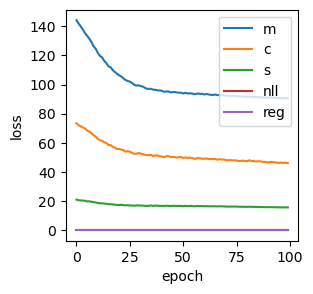

<Figure size 300x300 with 0 Axes>

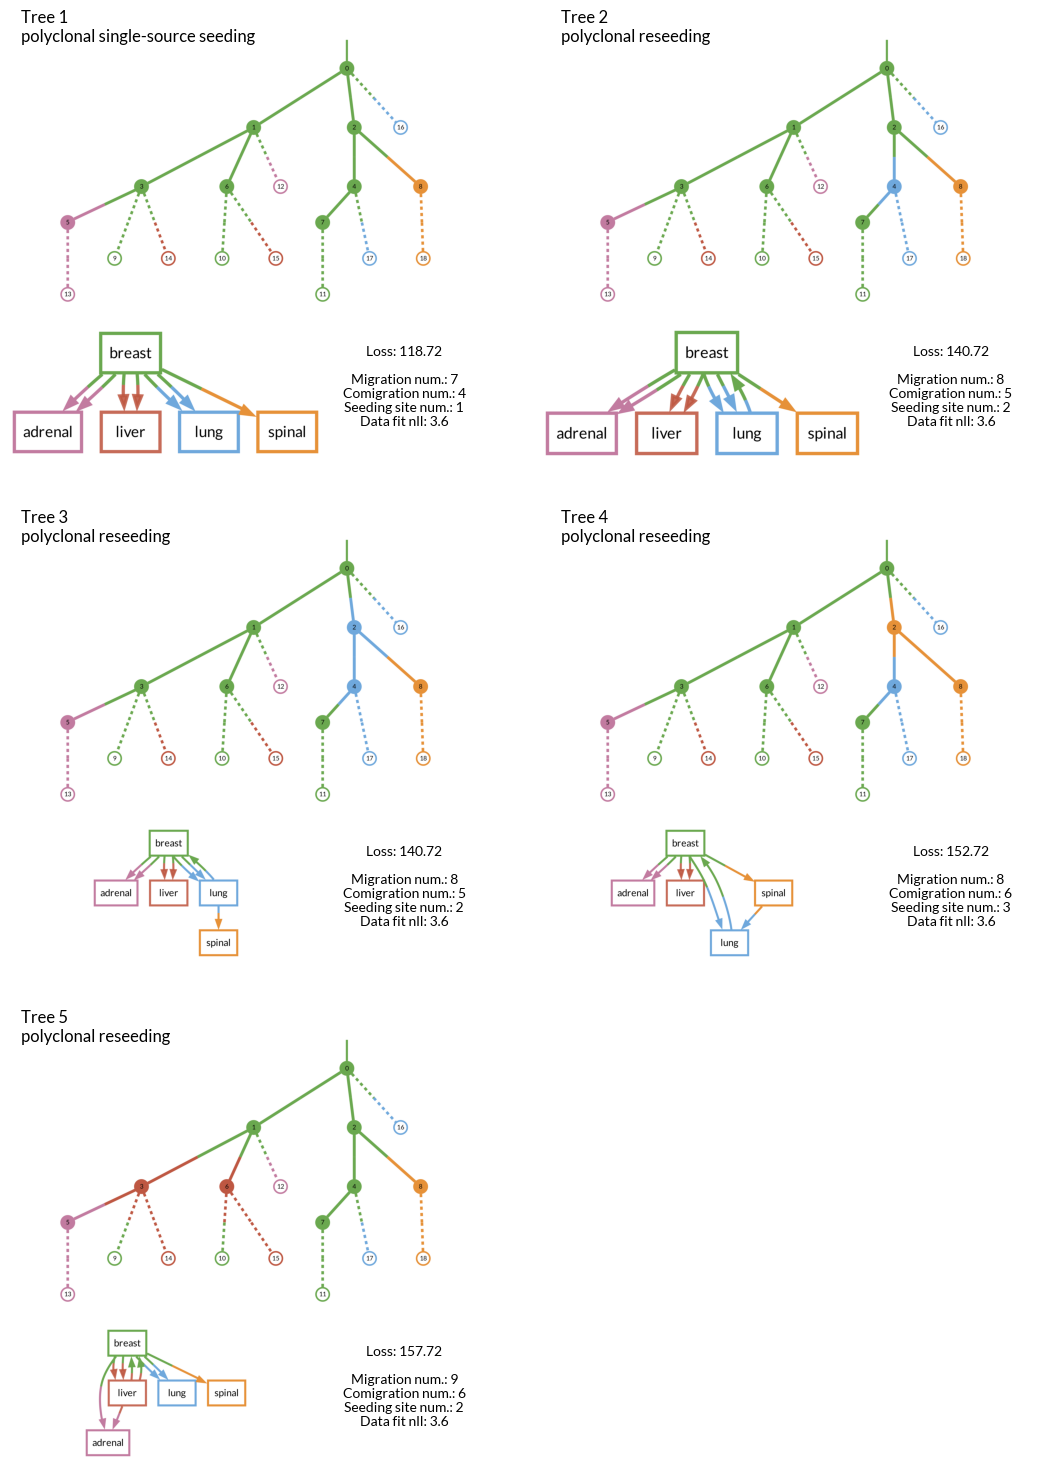

Saving A1_tree1 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A1

TREE 2
{0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '', 8: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 29.74it/s]


Time elapsed: 3.517163


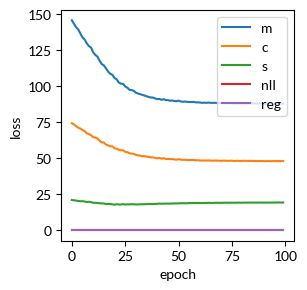

<Figure size 300x300 with 0 Axes>

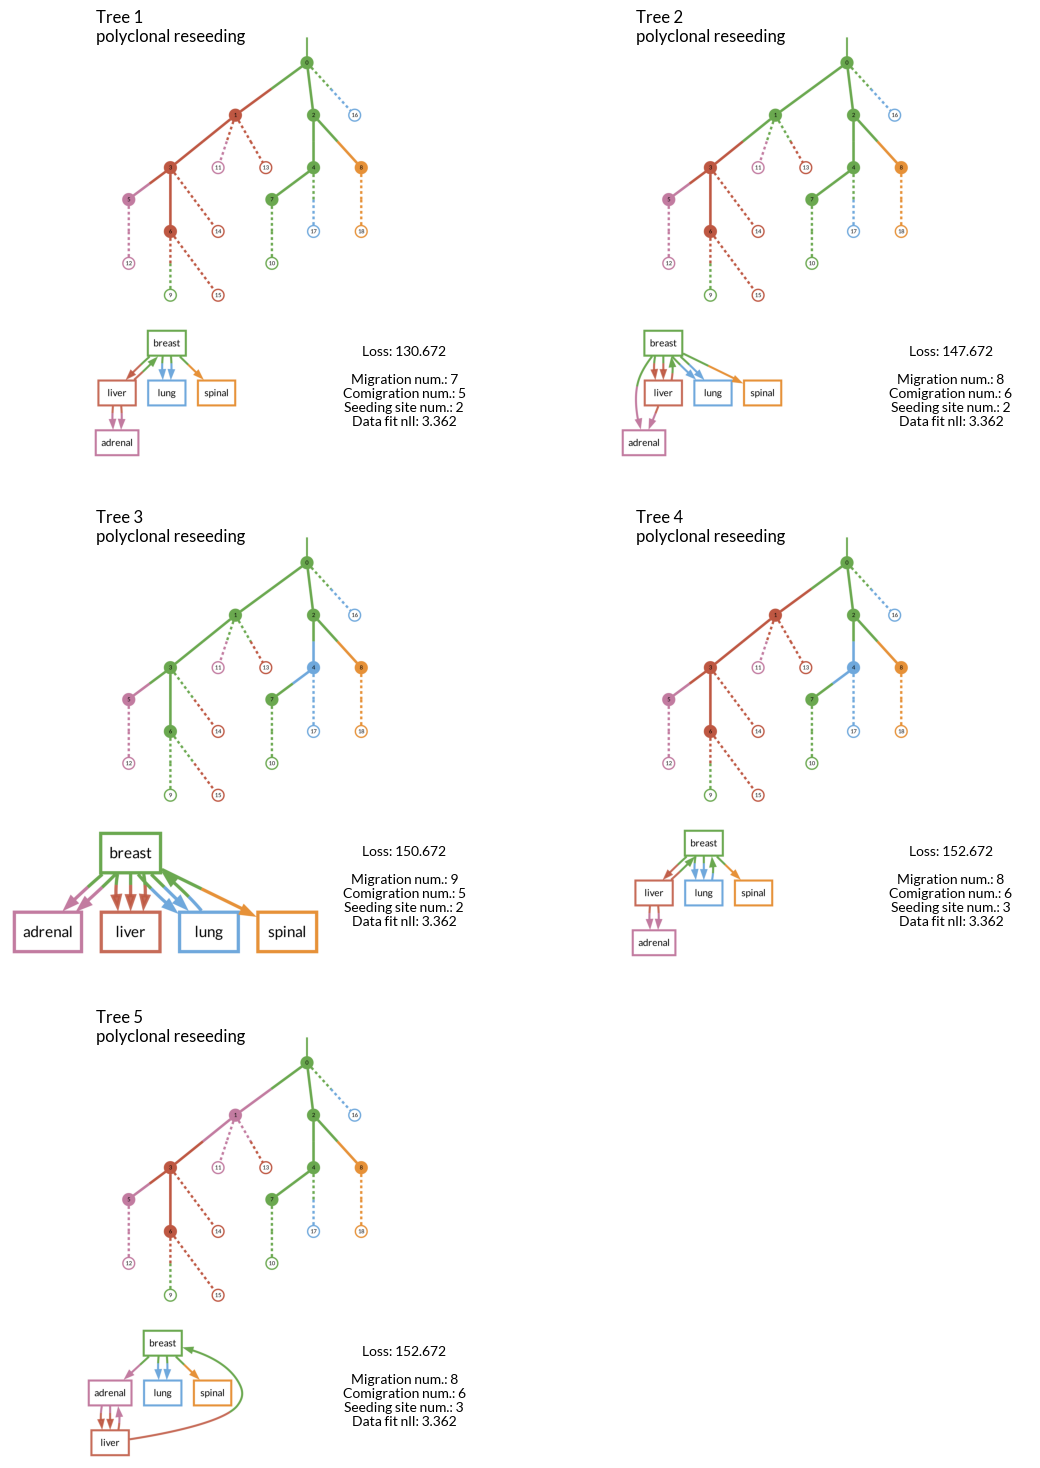

Saving A1_tree2 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A1


([('', ''),
  ('', ''),
  ('', '_lung'),
  ('', ''),
  ('', '_adrenal'),
  ('', '_liver'),
  ('', ''),
  ('', ''),
  ('', ''),
  ('', ''),
  ('', '_liver'),
  ('', ''),
  ('', '_lung'),
  ('', '_adrenal'),
  ('', '_breast'),
  ('', '_liver'),
  ('', '_breast'),
  ('', '_spinal')],
 {'': 'spinal',
  '_breast': 'breast',
  '_adrenal': 'adrenal',
  '_liver': 'liver',
  '_lung': 'lung',
  '_spinal': 'spinal'})

In [2]:
A1_out_dir = os.path.join(HOADLEY_DATA_DIR, "A1")
weights = Weights(data_fit=0.2, mig=10.0, comig=7.0, seed_site=5.0, reg=3.0, gen_dist=0.0, organotrop=0.0)
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1_SPRUCE_trees.txt"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_0.95.tsv"),
              custom_colors, weights, A1_out_dir, "A1")

### Patient A1, maximum parsimony + gen. dist. objective

num trees: 2
['breast', 'adrenal', 'liver', 'lung', 'spinal']

TREE 1
{0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '', 8: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 38.90it/s]


Time elapsed: 2.753719


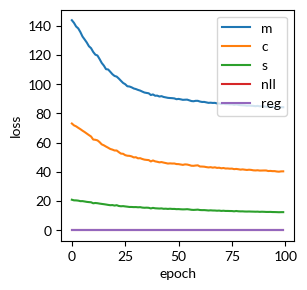

<Figure size 300x300 with 0 Axes>

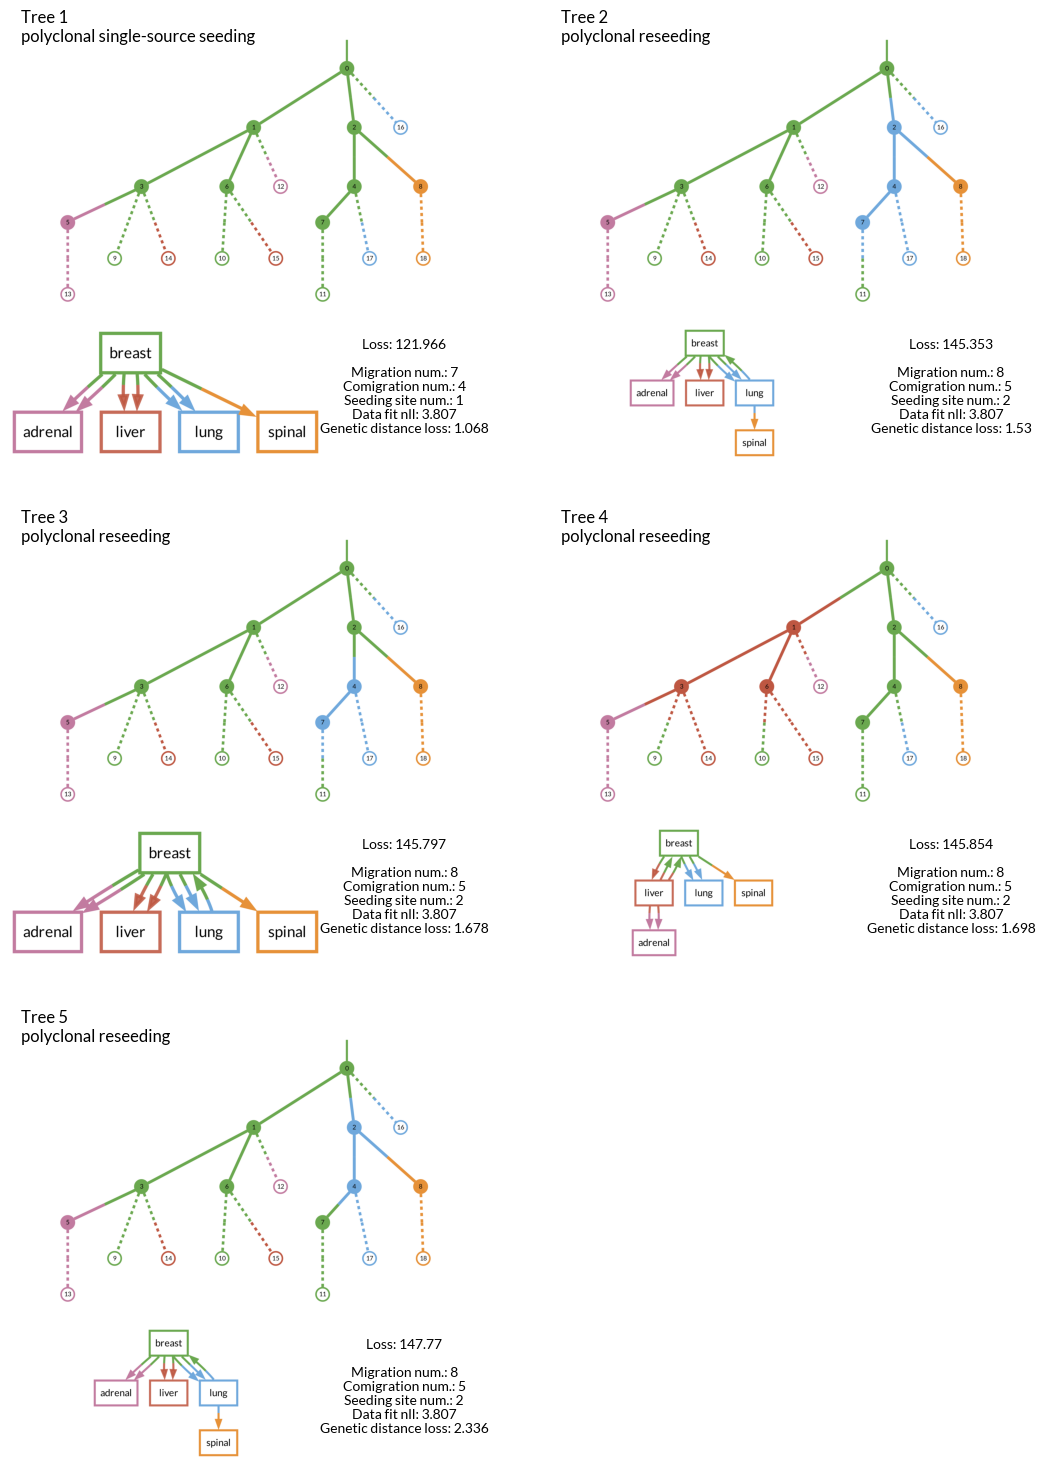

Saving A1_gd_tree1 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A1

TREE 2
{0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '', 8: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.18it/s]


Time elapsed: 4.295851


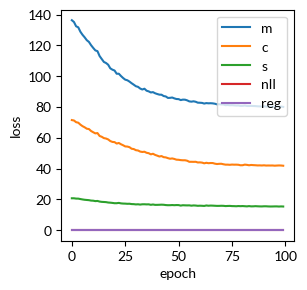

<Figure size 300x300 with 0 Axes>

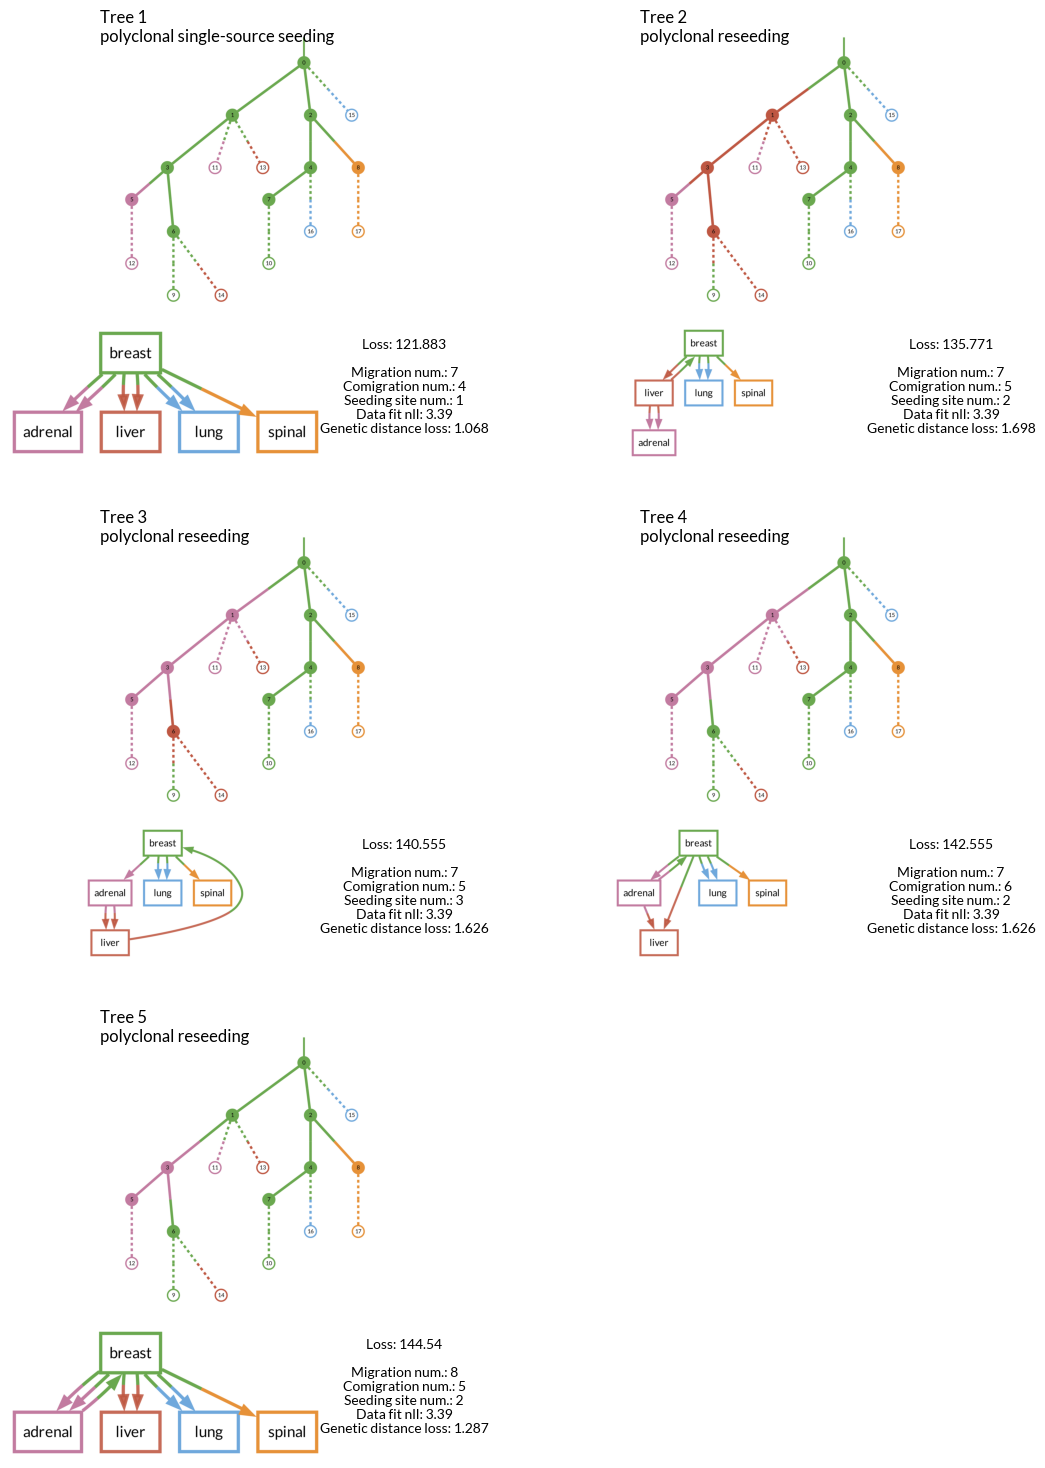

Saving A1_gd_tree2 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A1


([('', ''),
  ('', ''),
  ('', '_lung'),
  ('', ''),
  ('', '_adrenal'),
  ('', '_liver'),
  ('', ''),
  ('', ''),
  ('', ''),
  ('', ''),
  ('', ''),
  ('', '_lung'),
  ('', '_adrenal'),
  ('', '_breast'),
  ('', '_liver'),
  ('', '_breast'),
  ('', '_spinal')],
 {'': 'spinal',
  '_breast': 'breast',
  '_adrenal': 'adrenal',
  '_liver': 'liver',
  '_lung': 'lung',
  '_spinal': 'spinal'})

In [3]:
weights = Weights(data_fit=0.2, mig=10.0, comig=7.0, seed_site=5.0, reg=3.0, gen_dist=3.0, organotrop=0.0)
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1_SPRUCE_trees.txt"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_0.95.tsv"),
              custom_colors, weights,A1_out_dir, "A1_gd")


### Patient A1, maximum parsimony + gen. dist. + organotropism objective

num trees: 2
['breast', 'adrenal', 'liver', 'lung', 'spinal']

TREE 1
{0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '', 8: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.30it/s]

Time elapsed: 6.130243


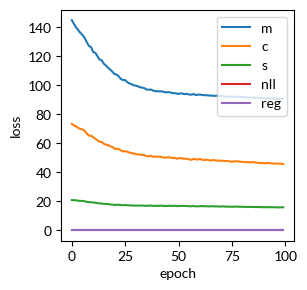

<Figure size 300x300 with 0 Axes>

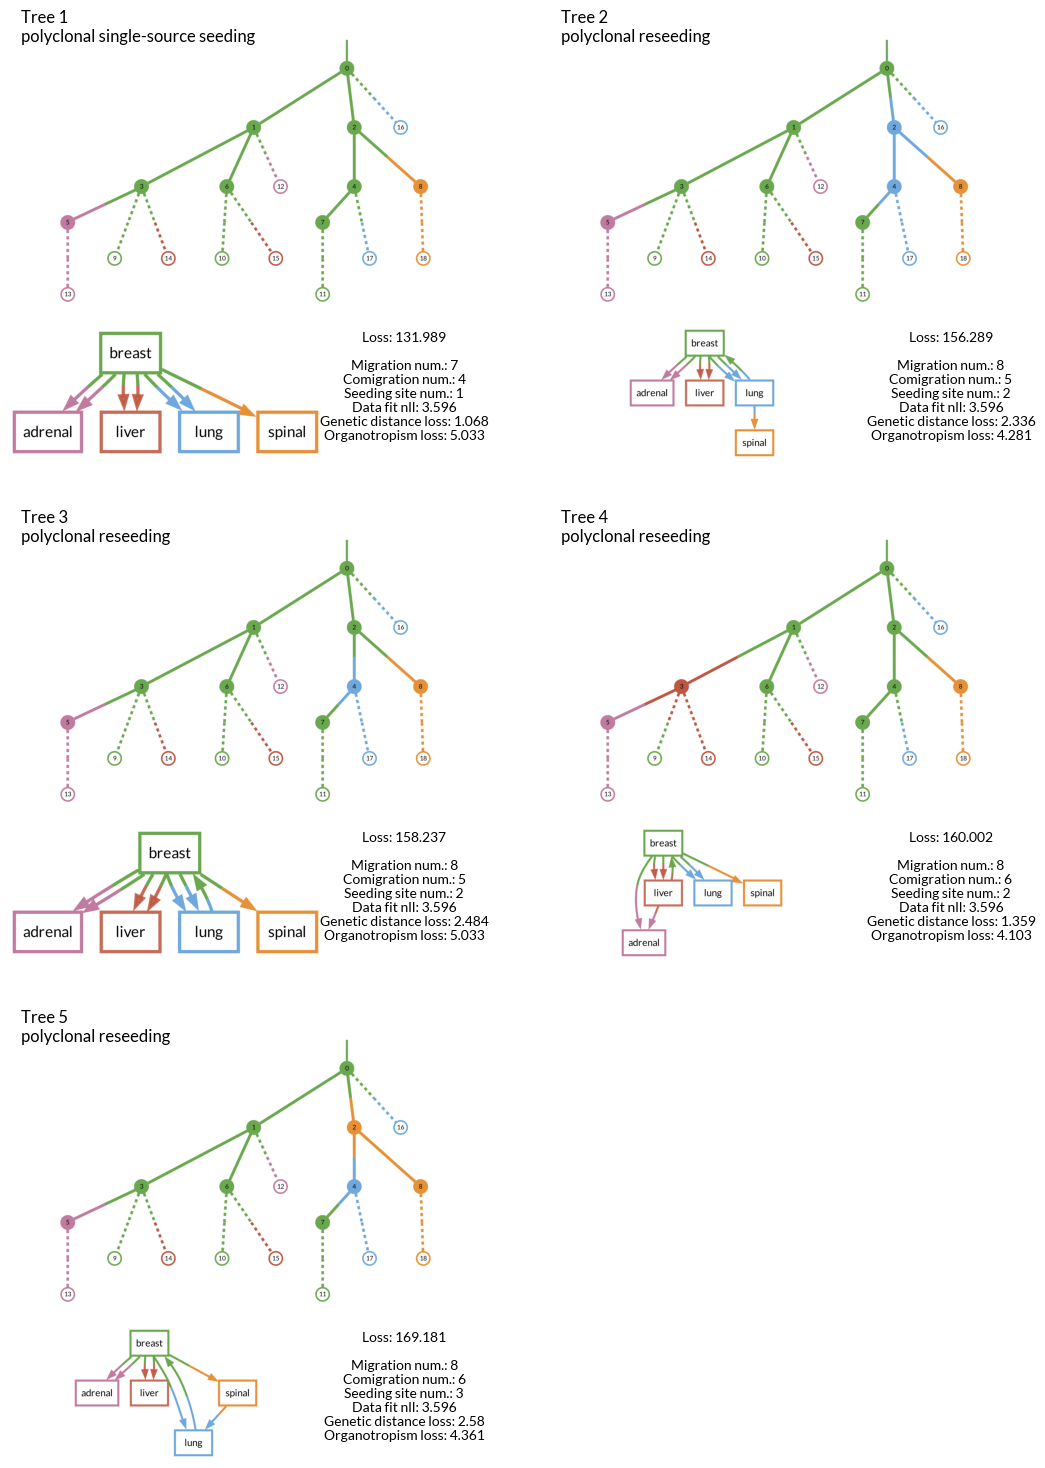

Saving A1_gd_organo_tree1 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A1

TREE 2
{0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: '', 8: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.86it/s]


Time elapsed: 3.72863


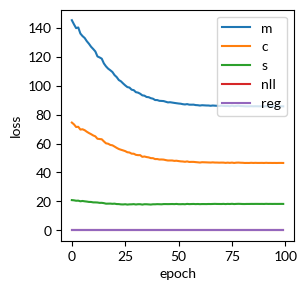

<Figure size 300x300 with 0 Axes>

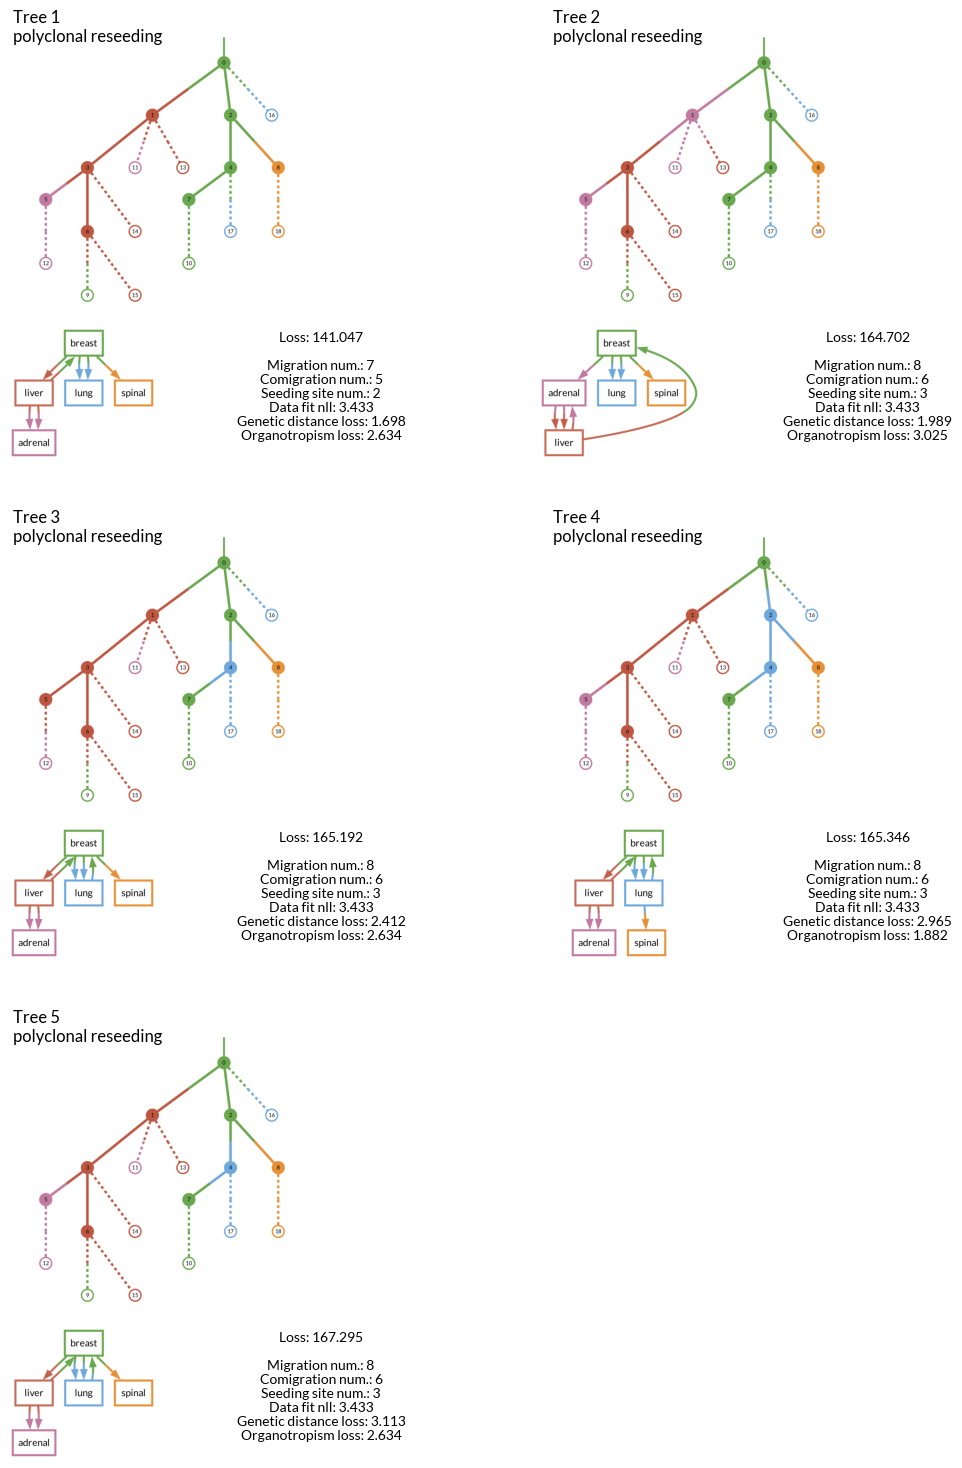

Saving A1_gd_organo_tree2 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A1


([('', ''),
  ('', ''),
  ('', '_lung'),
  ('', ''),
  ('', '_adrenal'),
  ('', '_liver'),
  ('', ''),
  ('', ''),
  ('', ''),
  ('', ''),
  ('', '_liver'),
  ('', ''),
  ('', '_lung'),
  ('', '_adrenal'),
  ('', '_breast'),
  ('', '_liver'),
  ('', '_breast'),
  ('', '_spinal')],
 {'': 'spinal',
  '_breast': 'breast',
  '_adrenal': 'adrenal',
  '_liver': 'liver',
  '_lung': 'lung',
  '_spinal': 'spinal'})

In [4]:
weights = Weights(data_fit=0.2, mig=10.0, comig=7.0, seed_site=5.0, reg=3.0, gen_dist=3.0, organotrop=2.0)
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1_SPRUCE_trees.txt"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_0.95.tsv"),
              custom_colors, weights, A1_out_dir, "A1_gd_organo")


### Patient A7, maximum parsimony objective

num trees: 2
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']

TREE 1
{0: 'CACNA1A', 1: '', 2: '', 3: 'MET', 4: '', 5: 'MACF1_CUL1', 6: '', 7: '', 8: 'PIK3CG', 9: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 49.87it/s]


Time elapsed: 2.326144


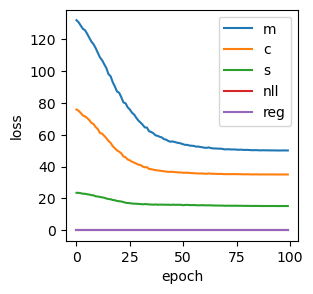

<Figure size 300x300 with 0 Axes>

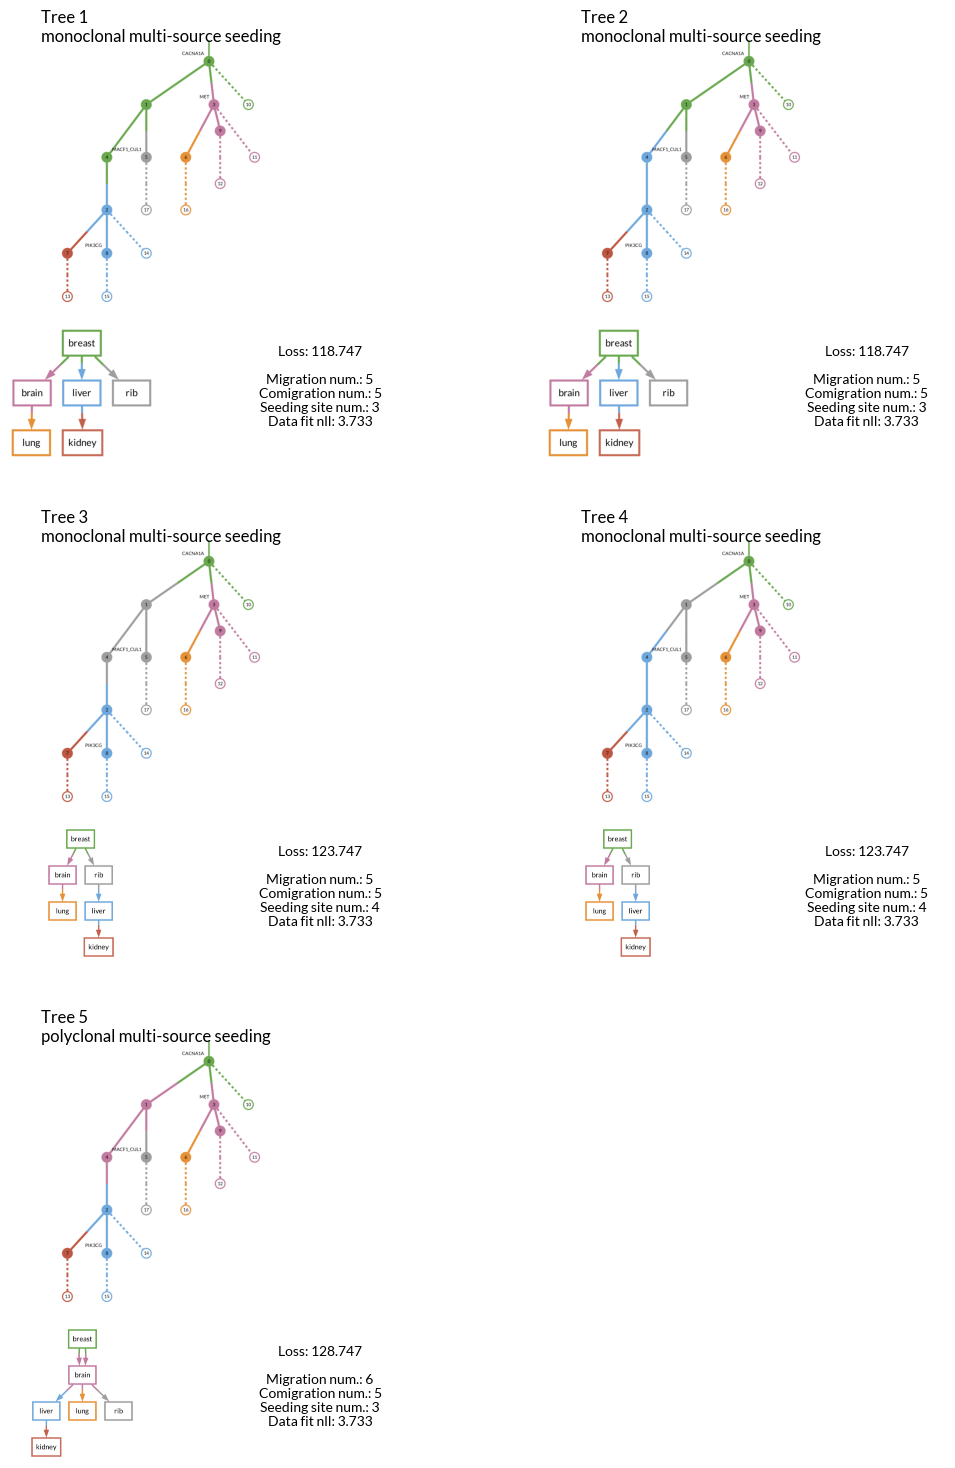

Saving A7_tree1 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A7

TREE 2
{0: 'CACNA1A', 1: '', 2: '', 3: 'MET', 4: '', 5: 'MACF1_CUL1', 6: '', 7: '', 8: 'PIK3CG', 9: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 47.90it/s]


Time elapsed: 2.311323


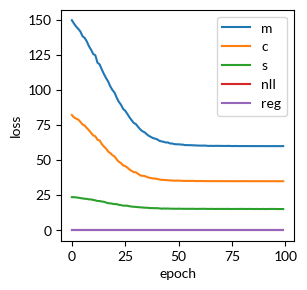

<Figure size 300x300 with 0 Axes>

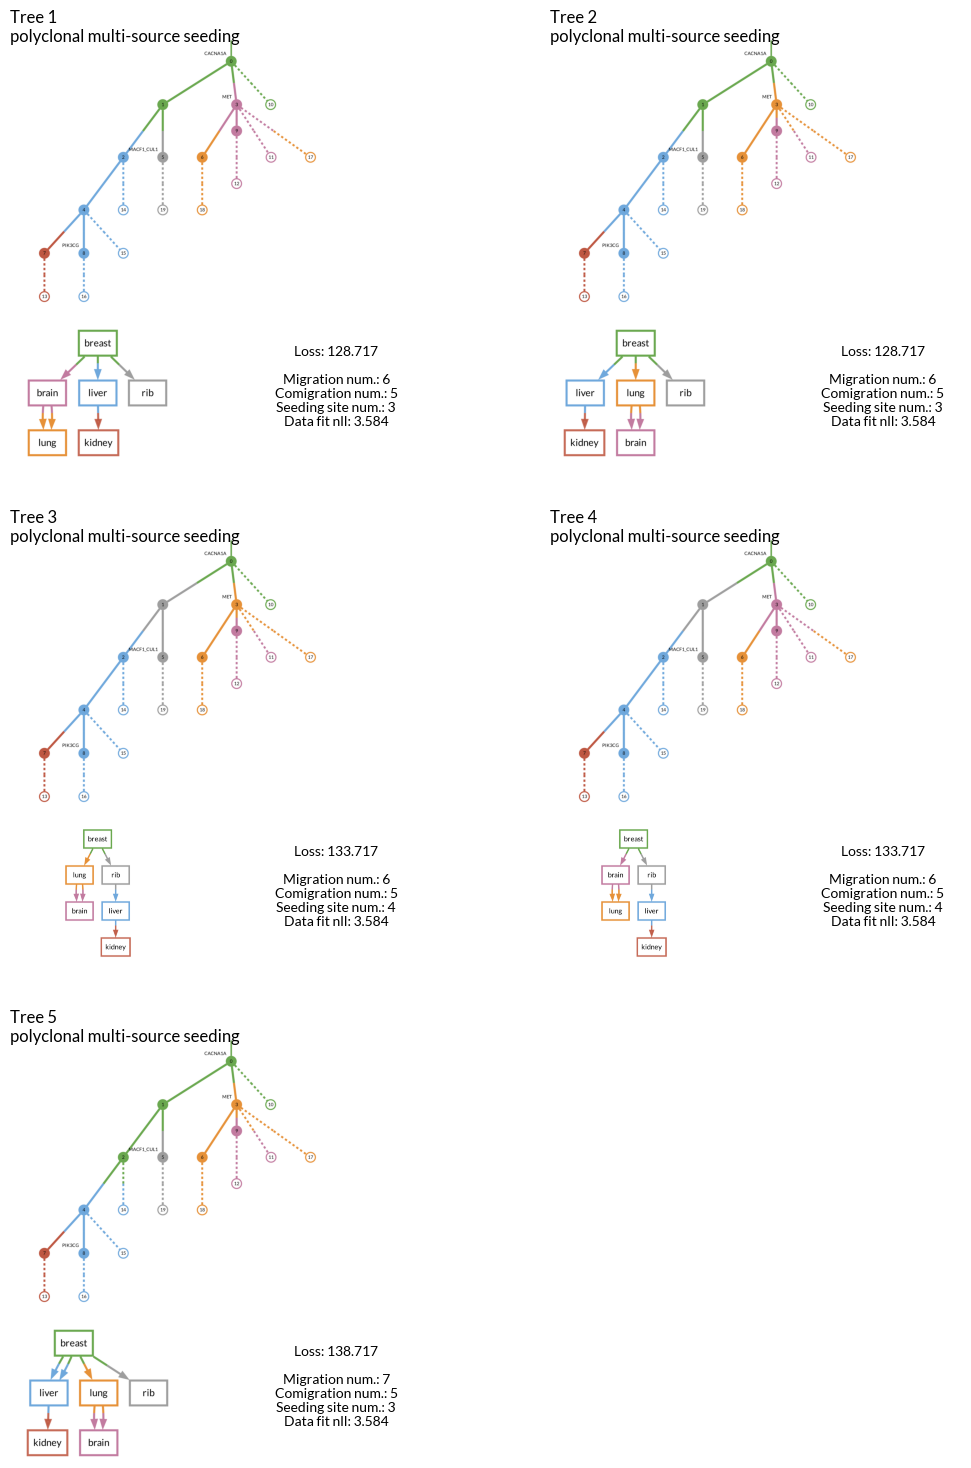

Saving A7_tree2 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A7


([('CACNA1A', ''),
  ('CACNA1A', 'MET'),
  ('CACNA1A', 'CACNA1A_breast'),
  ('', ''),
  ('', 'MACF1_CUL1'),
  ('', ''),
  ('', '_liver'),
  ('MET', ''),
  ('MET', ''),
  ('MET', 'MET_brain'),
  ('MET', 'MET_lung'),
  ('', ''),
  ('', 'PIK3CG'),
  ('', '_liver'),
  ('MACF1_CUL1', 'MACF1_CUL1_rib'),
  ('', '_lung'),
  ('', '_kidney'),
  ('PIK3CG', 'PIK3CG_liver'),
  ('', '_brain')],
 {'CACNA1A': 'breast',
  '': 'brain',
  'MET': 'brain',
  'MACF1_CUL1': 'rib',
  'PIK3CG': 'liver',
  'CACNA1A_breast': 'breast',
  'MET_brain': 'brain',
  '_brain': 'brain',
  '_kidney': 'kidney',
  '_liver': 'liver',
  'PIK3CG_liver': 'liver',
  'MET_lung': 'lung',
  '_lung': 'lung',
  'MACF1_CUL1_rib': 'rib'})

In [2]:
A7_out_dir = os.path.join(HOADLEY_DATA_DIR, "A7")
weights = Weights(data_fit=0.2, mig=10.0, comig=7.0, seed_site=5.0, reg=3.0, gen_dist=0.0, organotrop=0.0)
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7_SPRUCE_trees.txt"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_0.95.tsv"), 
              custom_colors, weights, A7_out_dir, "A7")


### Patient A7, maximum parsimony + gen. dist. objective

num trees: 2
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']

TREE 1
{0: 'CACNA1A', 1: '', 2: '', 3: 'MET', 4: '', 5: 'MACF1_CUL1', 6: '', 7: '', 8: 'PIK3CG', 9: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 37.81it/s]


Time elapsed: 2.805711


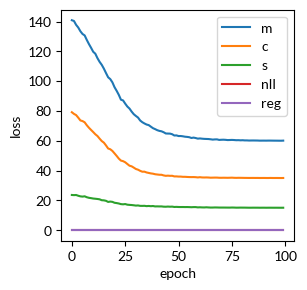

<Figure size 300x300 with 0 Axes>

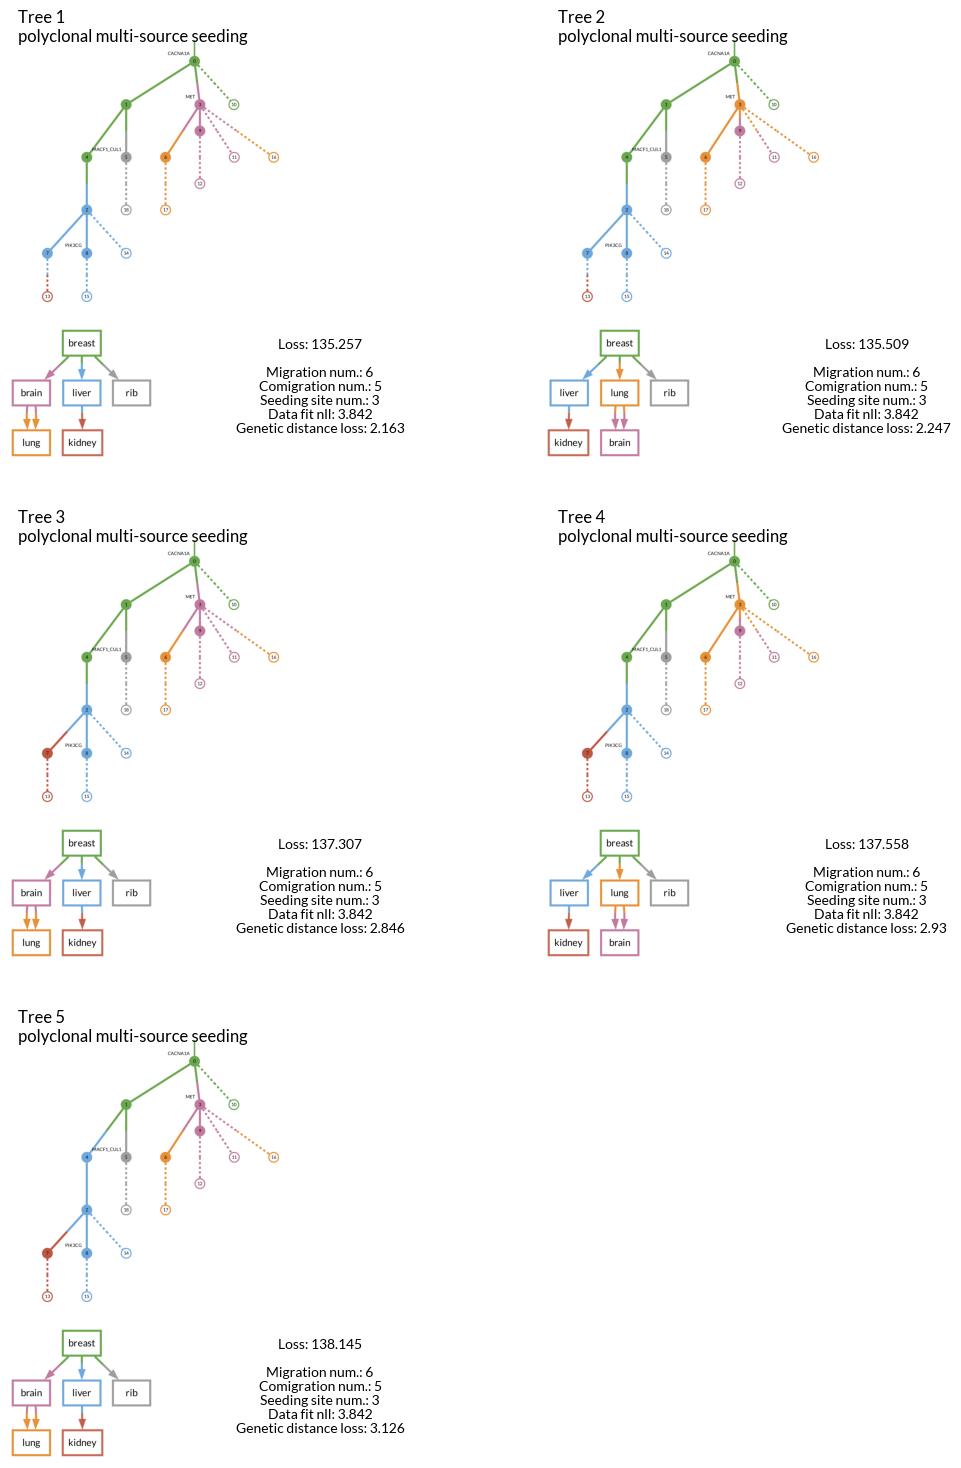

Saving A7_gd_tree1 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A7

TREE 2
{0: 'CACNA1A', 1: '', 2: '', 3: 'MET', 4: '', 5: 'MACF1_CUL1', 6: '', 7: '', 8: 'PIK3CG', 9: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 43.59it/s]


Time elapsed: 2.450135


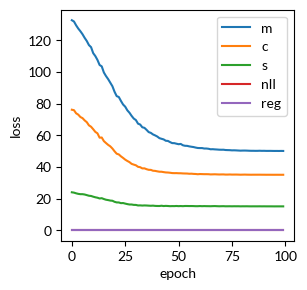

<Figure size 300x300 with 0 Axes>

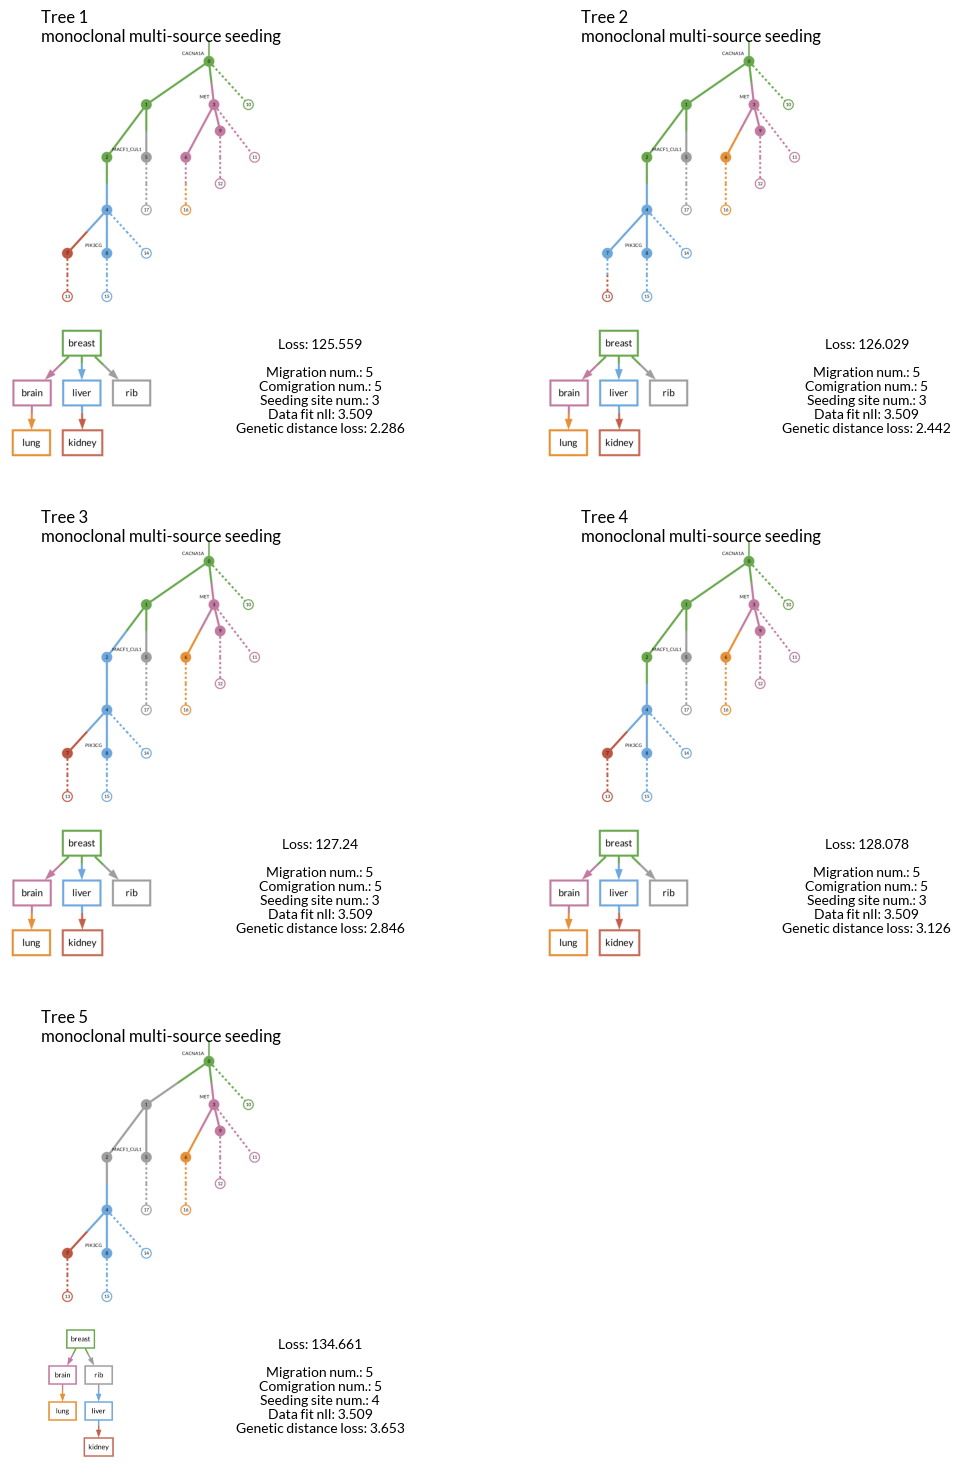

Saving A7_gd_tree2 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A7


([('CACNA1A', ''),
  ('CACNA1A', 'MET'),
  ('CACNA1A', 'CACNA1A_breast'),
  ('', ''),
  ('', 'MACF1_CUL1'),
  ('', ''),
  ('MET', ''),
  ('MET', ''),
  ('MET', 'MET_brain'),
  ('', ''),
  ('', 'PIK3CG'),
  ('', '_liver'),
  ('MACF1_CUL1', 'MACF1_CUL1_rib'),
  ('', '_lung'),
  ('', '_kidney'),
  ('PIK3CG', 'PIK3CG_liver'),
  ('', '_brain')],
 {'CACNA1A': 'breast',
  '': 'brain',
  'MET': 'brain',
  'MACF1_CUL1': 'rib',
  'PIK3CG': 'liver',
  'CACNA1A_breast': 'breast',
  'MET_brain': 'brain',
  '_brain': 'brain',
  '_kidney': 'kidney',
  '_liver': 'liver',
  'PIK3CG_liver': 'liver',
  '_lung': 'lung',
  'MACF1_CUL1_rib': 'rib'})

In [3]:
A7_out_dir = os.path.join(HOADLEY_DATA_DIR, "A7")
weights = Weights(data_fit=0.2, mig=10.0, comig=7.0, seed_site=5.0, reg=3.0, gen_dist=3.0, organotrop=0.0)
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7_SPRUCE_trees.txt"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_0.95.tsv"), 
              custom_colors, weights, A7_out_dir, "A7_gd")

### Patient A7, maximum parsimony + gen. dist. + organotropism objective

num trees: 2
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']

TREE 1
organotropism tensor([0.0224, 0.0569, 0.0064, 0.1236, 0.0797, 0.1671])
{0: 'CACNA1A', 1: '', 2: '', 3: 'MET', 4: '', 5: 'MACF1_CUL1', 6: '', 7: '', 8: 'PIK3CG', 9: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 41.95it/s]


Time elapsed: 2.620379


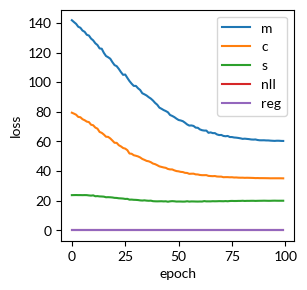

<Figure size 300x300 with 0 Axes>

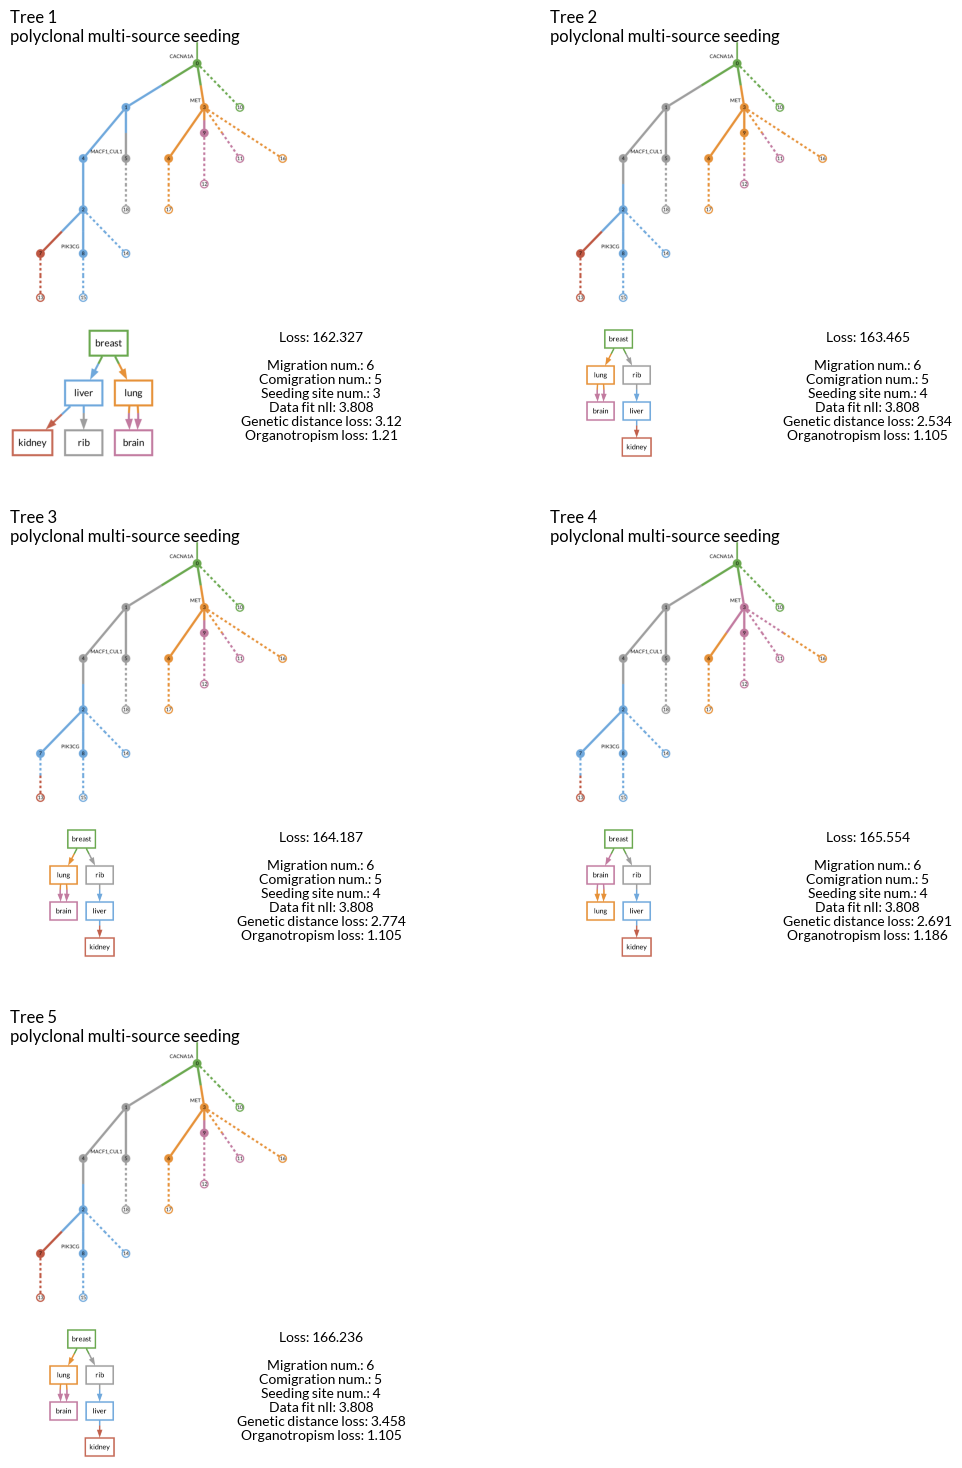

Saving A7_gd_organo_tree1 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A7

TREE 2
organotropism tensor([0.0224, 0.0569, 0.0064, 0.1236, 0.0797, 0.1671])
{0: 'CACNA1A', 1: '', 2: '', 3: 'MET', 4: '', 5: 'MACF1_CUL1', 6: '', 7: '', 8: 'PIK3CG', 9: ''}


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 36.42it/s]


Time elapsed: 2.898315


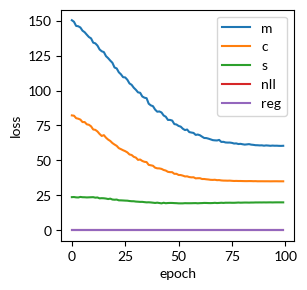

<Figure size 300x300 with 0 Axes>

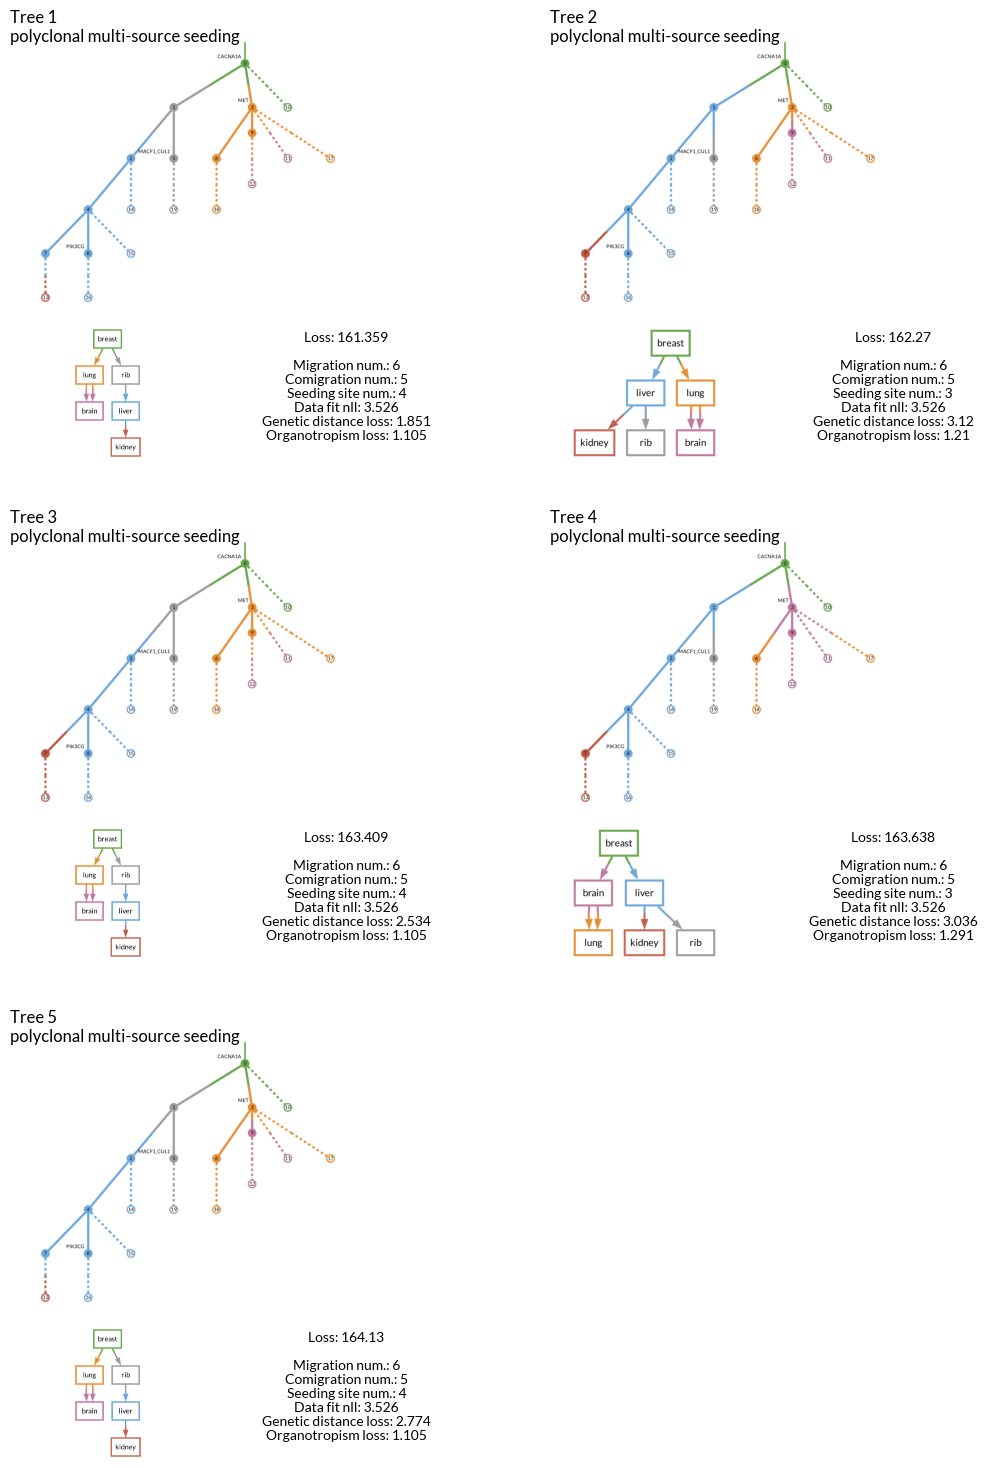

Saving A7_gd_organo_tree2 to /Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/jupyter_notebooks/../data/hoadley_breast_cancer_2016/A7


([('CACNA1A', ''),
  ('CACNA1A', 'MET'),
  ('CACNA1A', 'CACNA1A_breast'),
  ('', ''),
  ('', 'MACF1_CUL1'),
  ('', ''),
  ('', '_liver'),
  ('MET', ''),
  ('MET', ''),
  ('MET', 'MET_brain'),
  ('MET', 'MET_lung'),
  ('', ''),
  ('', 'PIK3CG'),
  ('', '_liver'),
  ('MACF1_CUL1', 'MACF1_CUL1_rib'),
  ('', '_lung'),
  ('', '_kidney'),
  ('PIK3CG', 'PIK3CG_liver'),
  ('', '_brain')],
 {'CACNA1A': 'breast',
  '': 'lung',
  'MET': 'lung',
  'MACF1_CUL1': 'rib',
  'PIK3CG': 'liver',
  'CACNA1A_breast': 'breast',
  'MET_brain': 'brain',
  '_brain': 'brain',
  '_kidney': 'kidney',
  '_liver': 'liver',
  'PIK3CG_liver': 'liver',
  'MET_lung': 'lung',
  '_lung': 'lung',
  'MACF1_CUL1_rib': 'rib'})

In [3]:
A7_out_dir = os.path.join(HOADLEY_DATA_DIR, "A7")
weights = Weights(data_fit=0.2, mig=10.0, comig=7.0, seed_site=5.0, reg=3.0, gen_dist=3.0, organotrop=20.0)
find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7_SPRUCE_trees.txt"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_0.95.tsv"), 
              custom_colors, weights, A7_out_dir, "A7_gd_organo")

In [ ]:
# metastatic subclone selection analysis of A7
ref_var_fn = os.path.join(HOADLEY_DATA_DIR, "A7/A7_0.95.tsv")
ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
print(unique_sites)

vaf_matrix = var_matrix / (var_matrix + ref_matrix)
purity = 0.95 # from Hoadley paper, is this right? probably need to re-estimate
mult = 1.0 # assume number of chromosomal copies that carry the mutation is 1.0
local_cn = 2.0 # assume local CN is 2 for now
ccf_matrix = ((vaf_matrix/(mult*purity))*((purity*local_cn) + (2*(1-purity)))).numpy()
ccf_matrix

In [ ]:
import numpy as np
# 0 = absent, 1 = subclonal, 2 = clonal
clonality_matrix = np.where(((ccf_matrix <= 0.5) & (ccf_matrix > 0.1)), 1, 0)
clonality_matrix = np.where((ccf_matrix > 0.5), 2, clonality_matrix)
clonality_matrix

In [ ]:
import pandas as pd
clonality_data = []
label_map = {0:"Absent", 1:"Subclonal", 2:"Clonal"}
num_subclones = clonality_matrix.shape[1]
for i in range(num_subclones):
    subclone_col = clonality_matrix[:,i]
    clonality_data.append([i]+[label_map[k] for k in subclone_col])

site_labels = [f"{site.capitalize()} Primary" if i == 0 else f"{site.capitalize()} Metastasis" for i, site in enumerate(unique_sites)]
clonality_df = pd.DataFrame(clonality_data, columns=["Subclone"]+site_labels)
clonality_df


In [ ]:
# we call mutations with CCF>0.5 as clonal mutations, mutations with CCF<=0.5 and CCF>0.1 are subclonal
# breast vs. liver
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
y = "Breast Primary"

c = 1
for i in [0,1]:
    for j in [0,1,2]:
        if c == len(clonality_df.columns): break
        x = clonality_df.columns[c]
        print(x)

        ax = sns.swarmplot(ax=axes[i,j], data=clonality_df, x=x, y=y, 
                           order=["Absent", "Subclonal", "Clonal"], size=10, 
                           hue="Subclone")
        sns.despine(offset=0, trim=True)
        ax.set_xlabel(x, fontsize=11)
        ax.set_ylabel(y, fontsize=11)
        ax.get_legend().remove()
        # there is only one axes for this plot; provide an alias for ease of use
#         ax.set_yticks(["Absent", "Subclonal", "Clonal"])
        # get the ytick locations for each name
        point_locs = []
        for path in ax.collections:
            point_locs.append(path.get_offsets())
            #print(path.get_label())

        point_locs = [list(item) for sublist in point_locs for item in sublist]
        c += 1
fig.suptitle(f"Metastasizing Clones", x=0.33, y=0.95, horizontalalignment='left', verticalalignment='top', fontsize=14, fontweight='bold')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=num_subclones)
    # for i, point_loc in enumerate(point_locs):
    #     ax.text(point_loc[0], point_loc[1]+0.05, str(i))
    # for i in range(num_subclones):
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)


In [ ]:
U_clip = [[0.4769335091114044, 0.5134045481681824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.3397281765937805, 0.0, 0.0, 0.0, 0.2556871175765991, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36632010340690613], [0.5697565078735352, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.40199223160743713, 0.0, 0.0], [0.1478603333234787, 0.0, 0.0, 0.06622103601694107, 0.0, 0.400208055973053, 0.0, 0.0, 0.0, 0.3738396167755127, 0.0], [0.3028472065925598, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.593723714351654, 0.0, 0.0, 0.0], [0.27643024921417236, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7042533159255981, 0.0, 0.0, 0.0, 0.0]]
sites = ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
prevalence_df = pd.DataFrame(U_clip, columns=["norm"] + [str(i) for i in range(len(U_clip[0])-1)], index=sites)
prevalence_df=prevalence_df.stack().reset_index().rename(columns={'level_0':'sample_id','level_1':'clone_id', 0:'clonal_prev'})
prevalence_df


In [ ]:
edges= [("norm", "0"), ('0', '1'), ('0', '3'), ('1', '2'), ('1', '5'), ('2', '4'), ('3', '6'), ('3', '9'), ('4', '7'), ('4', '8')]
tree_df = pd.DataFrame(edges, columns=["source", "target"])
tree_df


In [ ]:
x_coords = [205, 293, 440, 244, 405, 290]
y_coords = [660, 126, 835, 806, 624, 450]
sample_locs = pd.DataFrame([sites, sites, x_coords, y_coords]).T
sample_locs.columns = ["sample_id", "location_id", "x", "y"]
sample_locs

In [ ]:
sample_locs.to_csv(os.path.join(HOADLEY_DATA_DIR, "A7", "sample_locs.csv"), index=False)
tree_df.to_csv(os.path.join(HOADLEY_DATA_DIR, "A7","tree_df.csv"), index=False)
prevalence_df.to_csv(os.path.join(HOADLEY_DATA_DIR, "A7", "prevalence_df.csv"), index=False)

In [ ]:
HOADLEY_DATA_DIR

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R -i prevalence_df
library(mapscape)
hoadley_dir<-"/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/hoadley_breast_cancer_2016/A7/"
# clonal prevalences
clonal_prev <- read.csv(file.path(hoadley_dir, "prevalence_df.csv"))
print(clonal_prev)
# locations of each tumour sample on user-provided image
sample_locations <- read.csv(file.path(hoadley_dir, "sample_locs.csv"))
# genotype tree edges
tree_edges <- read.csv(file.path(hoadley_dir, "tree_df.csv"))
# image reference
img_ref <- file.path(hoadley_dir, "anatomical_sites.png")
# radial order of samples
sample_ids <- c('breast', 'brain', 'kidney', 'liver', 'lung', 'rib')
# run mapscape
mapscape(clonal_prev = clonal_prev, tree_edges = tree_edges, sample_locations = sample_locations, 
img_ref = img_ref,show_warnings=TRUE)

# library(mapscape)
# hoadley_dir <- "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/hoadley_breast_cancer_2016/A7"
# mapscape(clonal_prev = prevalence_df, tree_edges=tree_df, sample_locations=sample_locs, img_ref=file.path(hoadley_dir, "anatomical_sites.png"))


In [ ]:
%%R -i prevalence_df
library(mapscape)
